# Laboratorio 1: Eliminación de anomalías y ajuste de intensidad en imágenes

### Por: Octavio Perez Bravo

# Introduccion

Durante esta actividad se emplean metodologias para la deteccion y eliminacion de anomalias y ruido en imagen. El proposito de este laboratorio es la presentacion de diversas tecnicas que permiten la immplementacion de filtros que corrigan la imagen. El uso de filtros y modelos estadisticos para la eliminacion de ruido presenta una meta imprtante para diversos sectores como lo pdrian ser:

**Seguridad:** Resaltar y pulird imagenes de baja calidad para la identificacion de pistas o personas de interes en imagenes aumentadas desde camaras de seguridad, o fotografias de escenas de crimen. <br> <br>
**Astronomia:** Aun con la potente instrumentacion al alcance de las organizaciones cientificas, las imagenes capturadas de objetos o fenomenos que se encuentran a distancias monumentales la calidad de las muestras obtenidas puede resultar con ruido o anomalias inesperadas. <br><br>
**Geografia:** Gracias a las imagenes satelitales cada vez es mas facil hacer mapas o cartografia en sitios inaccesibles para el ser humano. sin embargo estas imagenes satelitales suelen venir con anomalias o ruidos que pueden afectar la identificacion de zonas de interes. <br><br>
**Arqueologia e Historia:** La restauracion de fotografias antiguas, pinturas o bocetos que debido al paso del tiempo se han deteriorado representa una oportunidad para los arqueologos e historiadores en encontrar nuevos detalles y perseverar las obras de autores de interes. <br><br>
**Artes visuales:** Tanto en el cine, el dibujo artistico y otras artes visuales el uso de metodos estadisticos o de machine learning para la correccion de imagenes presenta una nueva oportunidad para las artes visuales en mejorar algunas tecnicas o expolorar nuevos panoramas artisticos. <br><br>
**Periodismo:** Tanto la restauracion de fotografias antiguas como el pulir las fotografias tomadas al momento de un articulo, la eliminacion de anomalias y ajustes de imagen permiten a los periodistas corregir las imagenes capturadas para una presentacion de mayor impacto. <br>
<br><br>
Teniendo en cuenta todas las opoirtunidades que se presentan a partir de la eliminacion de anomalias y ajustes de intensidad, este trabajo tiene como objetivo presentar algunas tecnicas que permitan eliminar el ruido del tipo "sal y pimienta" y ajuste de intensidad.

# Eliminacion de ruido sal y pimienta

El ruido "sal y pimienta" se caracteriza por pixeles completamente blancos (sal) y pixeles completamente negros (pimienta) distribuidos aleatoriamente en una imagen. y existen multiples causas que pueden producir una imagen ruidosa por "sal y pimienta" como lo son errores en la conversion analogico a digital, pixeles corruptos en sensores de las camaras o errores durante la transmision de una imagen como lo que solia ocurrir con televisores antiguos que tenian problemas con la recepcion de la senal.

In [16]:
# Importacion de paquetes necesarios para este trabajo
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

Para facilitar el mantenimiento y la legibilidad de este trabajo. En esta primera etapa se procede a definir algunas de las funciones mas recurrentes que seran usadas a lo largo de este trabajo. y conforme estas funciones sean llamadas seran explicadas.

In [5]:

# Funcion para comparar imagen original e imagen modificada
def comparar_imagenes(titulo_original = "original", original = None, 
                      titulo_nueva = "alterada", nueva = None, 
                      size = 10, axis = 'off'):
    
    w, h = original.shape[0], original.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.subplot(1,2,1)
    plt.axis(axis)
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title(titulo_original)
    plt.subplot(1,2,2)
    plt.axis(axis)
    plt.imshow(cv.cvtColor(nueva, cv.COLOR_BGR2RGB))
    plt.title(titulo_nueva)

    plt.show()

# Funcion para leer imagenes
def leer_imagen(path = '', grey_scale = False):
    if grey_scale == False:
        imagen = cv.imread(path)
    else:
        imagen = cv.imread(path,cv.IMREAD_GRAYSCALE)
    return imagen

def mostrar_imagen(titulo = "Imagen", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.axis('off')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(titulo)
    plt.show()

# Funcion para agregar ruido de sal y pimienta toma una imagen original (sin ruido)
# y modificara pixeles aleatorios a negro o blanco con una probabilidad default de 20%
def agregar_ruido(original = None, probabilidad=0.20):
    ruidosa = original.copy()
    ruido = np.random.rand(*original.shape)
    ruidosa[ruido < probabilidad/2] = 255  # Sal (blanco)
    ruidosa[ruido > 1-probabilidad/2] = 0  # Pimienta (negro)
    return ruidosa





def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Muestras fotograficas originales


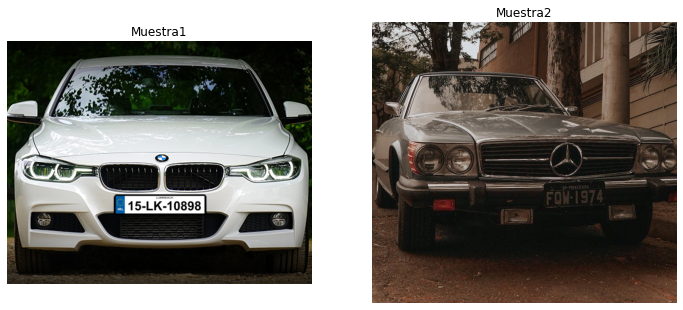

Muestras fotograficas en blanco y negro


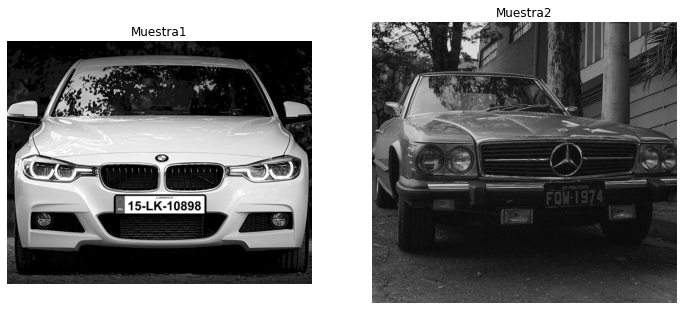

In [11]:
# Lectura de imagenes usando el modulo de CV
imagen01 = leer_imagen('CochesVarios/Cars167.png')
imagen02 = leer_imagen('CochesVarios/coche11.jpeg')

print("Muestras fotograficas originales")
comparar_imagenes(titulo_original='Muestra1', original=imagen01, titulo_nueva='Muestra2', nueva=imagen02, size=15)

# Convertir las imagenes en escalas de grises
imagen01 = leer_imagen('CochesVarios/Cars167.png', True)
imagen02 = leer_imagen('CochesVarios/coche11.jpeg', True)

print("Muestras fotograficas en blanco y negro")
comparar_imagenes(titulo_original='Muestra1', original=imagen01, titulo_nueva='Muestra2', nueva=imagen02, size=15)


## Agregar Ruido

Una vez completada la lectura de las imagenes y su conversion a escala de grises se procede a agregar el ruido de "sal y pimienta" la agregacion de este ruido se logra a partir de la modificacion de pixeles seleccionados aleatoriamente en la imagen a escala de grises. La primera parte consiste en generar una matriz del mismo tamano de la resolucion de la imagen original, esta matriz se llena con valores generados aleatoriamente entre 0 y 1. A partir de la matriz generada se compara con cada pocison de la matriz contra la pocision de cada pixel de la imagen original. Estos pixeles son modificados a blanco (sal) si el valor aleatorio generado es menor a la probabilidad dividida entre 2 o a negro (pimienta) si el valor aleatorio generado es igual a 1-probabilidad dividido entre 2

Agregar ruido a la primera muestra


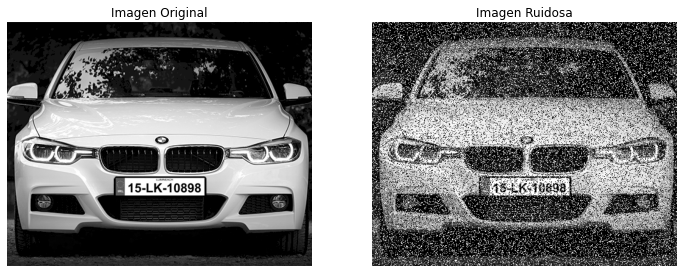

Agregar ruido a la segunda muestra


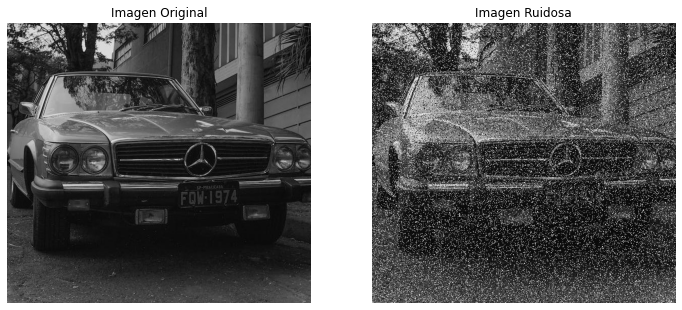

In [13]:
imagen01_ruido = agregar_ruido(original = imagen01, probabilidad=0.30)
imagen02_ruido = agregar_ruido(original = imagen02, probabilidad=0.20)

print("Agregar ruido a la primera muestra")
comparar_imagenes(titulo_original='Imagen Original', titulo_nueva='Imagen Ruidosa', original=imagen01, nueva=imagen01_ruido, size=15)
print("Agregar ruido a la segunda muestra")
comparar_imagenes(titulo_original='Imagen Original', titulo_nueva='Imagen Ruidosa', original=imagen02, nueva=imagen02_ruido, size=13)

## Correcion de ruido sal y pimienta

Una de las tecnicas mas populares para la eliminacion de ruido del tipo "sal y pimienta" es mediante la implementacion de tecnicas estadisticas debido a que como se explico previamente una imagen puede ser considerada como una matriz bidimensional debido a que la pocision de un pixel en la imagen y el valor como la intensidad del pixel en escala de grises. Una de las tecnicas mas populares para la eliminacion de este tipo de ruido es el filtro de mediana el cual sigue los siguientes pasos:

1. Convertir la imagen ruidosa en un array de numpy para realizar las operaciones matematicas sobre la matriz obtenida y generar una matriz de 0s con la resolucion de la imagen
2. Seleccionar una ventana de comparacion (tamano del filtro) desde un elemento central en el pixel procesado representado como Pij
3. Si el elemento central Pij no es interpretado como un pixel corrompido (0 < Pij < 255) entonces se deja el valor sin cambiar
4. Si Pij tiene un valor de 0 o 255 entonces se le puede considerar como valor corrupto
5. En el caso de que todos los elementos de la ventana sean ruidosos (0 o 255) entonces se reemplaza el valor de Pij por la mediana de los elementos en la ventana entonces se almacena el valor en un array temporal
6. El proceso se itera para todas las pocisiones Pij de la imagen.
7. Una vez procesados todos los elementos Pij de la imagen, los valores no corruptos de cada pocision sustituyen la misma pocision en la matriz de 0s, mientras que los valores corruptos son sustituidos con la mediana de la ventana almacenada en el array temporal.
8. Convertimos el array final a una imagen.

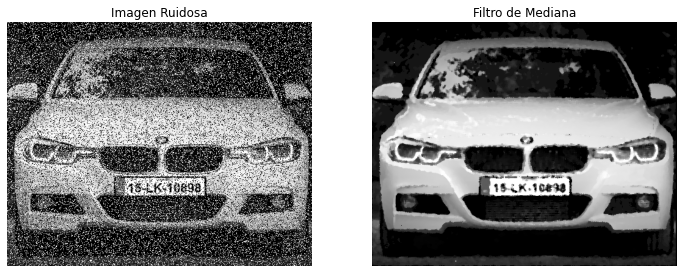

In [14]:
# Implementacion manual de un filtro de mediana

def filtro_mediana(imagen, tamano_filtro):
    array = np.array(imagen)
    temp = [] # Array temporal para almacenar valores
    indexador = tamano_filtro // 2
    #array_final = []
    array_final = np.zeros((len(array),len(array[0])))
    # Iteracion sobre todos los valores en el eje horizontal P(i)
    for i in range(len(array)):
    # Iteracion sobre todos los pixeles en el eje vertical P(j)
        for j in range(len(array[0])):
    # iteracion sobre la ventana seleccionada del filtro.
            for ventana in range(tamano_filtro):
                if i + ventana - indexador < 0 or i + ventana - indexador > len(array) - 1:
                    for c in range(tamano_filtro):
                        temp.append(0)
                else:
                    if j + ventana - indexador < 0 or j + indexador > len(array[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(tamano_filtro):
                            temp.append(array[i + ventana - indexador][j + k - indexador])
            temp.sort()
    #Calcula la mediana para el elemento Pij con el tamano del array dividido entre 2
            array_final[i][j] = temp[len(temp) // 2]
            temp = []
    # Convertir array de float64 a Unit8
    image_min = array_final.min()
    image_max = array_final.max()

    # Normalizar de [0, 255]
    image_normalized = 255 * (array_final - image_min) / (image_max - image_min)
    image_uint8 = image_normalized.astype('uint8')
    #imagen_filtrada = img.fromarray(array_final)
    return image_uint8



imagen01_filtrada = filtro_mediana(imagen01_ruido, 5)
imagen02_filtrada = filtro_mediana(imagen02_ruido, 5)
comparar_imagenes(titulo_original="Imagen Ruidosa", original=imagen01_ruido, 
                  titulo_nueva="Filtro de Mediana", nueva=imagen01_filtrada, size=15)



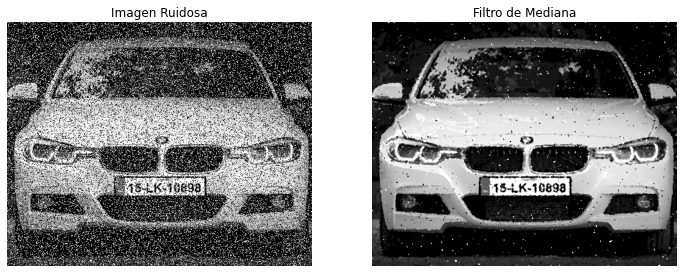

In [18]:
# Implementacion mediante Filtro de opencv
import cv2
imagen01_filtradacv = cv2.medianBlur(imagen01_ruido, 3)
imagen02_filtradacv = cv2.medianBlur(imagen02_ruido, 3)

comparar_imagenes(titulo_original="Imagen Ruidosa", original=imagen01_ruido, 
                  titulo_nueva="Filtro de Mediana", nueva=imagen01_filtradacv, size=15)

## Comparacion cuantitativa de restauracion de imagenes

Para poder comparar la restauracion de las imagenes se aplicara la tecnica cuantitativa PSNR (Peak Signal-to-Noise Ratio) esta tecnica permite comparar el ruido de una imagen en comparacion de una muestra original. 
<br><br>
**Formula PSNR**
<br>
El PSNR Se define en términos de la relación entre la intensidad máxima posible de un píxel y el error cuadrático medio.
$$PSNR = 20* log_{10} \left(\frac{MAX_I}{\sqrt{\text{MSE}}}\right)$$

**Formula Mean Square Error** <br>
(Error Cuadrático Medio) mide la diferencia promedio entre los píxeles correspondientes de las dos imágenes.
$$MSE = \frac{1}{m \cdot n} \sum_{i=1}^{m} \sum_{j=1}^{n} \left[ I_{\text{original}}(i,j) - I_{\text{restaurada}}(i,j) \right]^2$$


**Interpretación del PSNR** <br>

* Valores altos: Indican que la imagen procesada es muy similar a la original (menos ruido o distorsión).
* Valores bajos: Indican mayor diferencia entre la imagen original y la procesada, lo que implica más distorsión.


In [19]:
# Función para calcular el MSE
def calcular_mse(original, restaurada):
    return np.mean((original - restaurada) ** 2)

# Función para calcular el PSNR
def calcular_psnr(original, restaurada):
    mse = calcular_mse(original, restaurada)
    if mse == 0:  
        return float('inf')  
    max_pixel = 255.0 
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Calcular PSNR con el promedio de ambas imagenes
psnr_cv = (calcular_psnr(imagen01, imagen01_filtradacv) + calcular_psnr(imagen02, imagen02_filtradacv))/2
psnr_manual = (calcular_psnr(imagen01, imagen01_filtrada) + calcular_psnr(imagen02, imagen02_filtrada))/2
psnr_ruido = calcular_psnr(imagen01, imagen01_ruido)
print(f"PSNR para metodo de CV: {psnr_cv:.2f} dB")
print(f"PSNR para metodo manual: {psnr_manual:.2f} dB")

PSNR para metodo de CV: 33.28 dB
PSNR para metodo manual: 31.35 dB


## Conclusiones
A partir de los resulatdos obtenidos a partir del PSNR de ambos metodos se puede concluir que aunque el metodo de filtro de mediana manual produce una imagen con menor filtrado no agrega tanta distorcion como el metodo de open cv el cual reduce mas el ruido sal y pimienta, sin embargo produce una imagen menos pristina. Asi que dependiendo de las necesidades finales del usuario puede seleccionar cual de ellas es mas conveniente para el resultado final esperado.

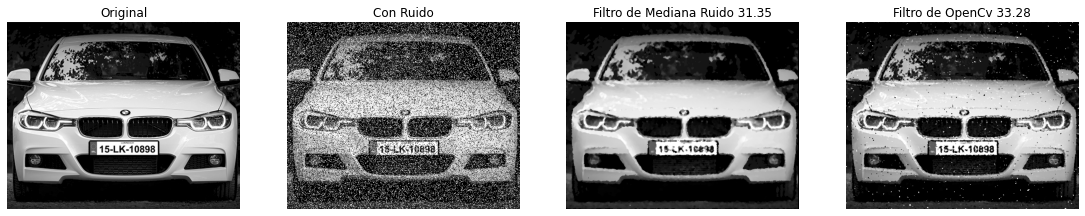

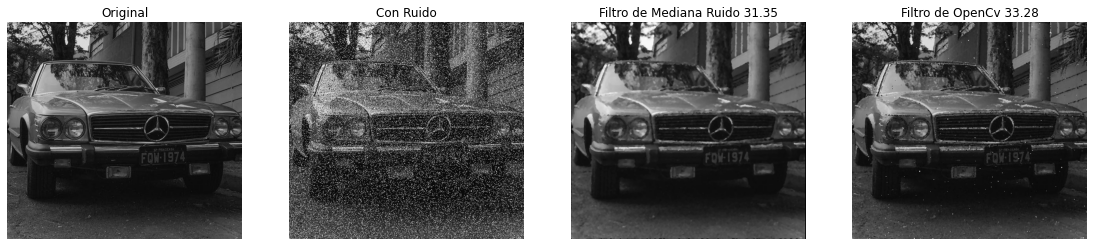

In [20]:
def comparar_todo(original,ruidosa,filtrado_manual,filtrado_cv, size):
    w, h = original.shape[0], original.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.subplot(1,4,1)
    plt.axis("off")
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.title("Original")
    plt.subplot(1,4,2)
    plt.axis("off")
    plt.imshow(cv.cvtColor(ruidosa, cv.COLOR_BGR2RGB))
    plt.title("Con Ruido")
    plt.subplot(1,4,3)
    plt.axis("off")
    plt.imshow(cv.cvtColor(filtrado_manual, cv.COLOR_BGR2RGB))
    plt.title(f"Filtro de Mediana Ruido {psnr_manual:.2f}")
    plt.subplot(1,4,4)
    plt.axis("off")
    plt.imshow(cv.cvtColor(filtrado_cv, cv.COLOR_BGR2RGB))
    plt.title(f"Filtro de OpenCv {psnr_cv:.2f}")
    plt.show
comparar_todo(imagen01, imagen01_ruido, imagen01_filtrada,  imagen01_filtradacv, 24)
comparar_todo(imagen02, imagen02_ruido, imagen02_filtrada,  imagen02_filtradacv, 21)

# Ajuste de intensidad

In [21]:

import numpy as np
import cv2

# Función para calcular el MSE
def calculate_mse(original, restored):
    return np.mean((original - restored) ** 2)

# Función para calcular el PSNR
def calculate_psnr(original, restored):
    mse = calculate_mse(original, restored)
    if mse == 0:  # Las imágenes son idénticas
        return float('inf')  # PSNR infinito
    max_pixel = 255.0  # Valor máximo para imágenes de 8 bits
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Leer imágenes original y restaurada
original = cv2.imread('imagen_original.jpg')
restored = cv2.imread('imagen_restaurada.jpg')

# Asegurar que tengan el mismo tamaño
original = cv2.resize(original, (restored.shape[1], restored.shape[0]))

# Calcular PSNR
psnr_value = calculate_psnr(original, restored)
print(f"PSNR: {psnr_value:.2f} dB")

AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
import numpy
#from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = imagen01_ruido
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    img.show()


main()

NameError: name 'Image' is not defined

In [46]:
ruido = np.random.rand(*img01.shape)
ruido2 = np.random.rand(*img02.shape)   
#ruido = np.random.rand(img01.shape[0],img01.shape[1])   

In [47]:
ruido
ruido2

array([[0.47897562, 0.33338845, 0.90619051, ..., 0.4133339 , 0.25156913,
        0.44983862],
       [0.58948357, 0.69342443, 0.35719163, ..., 0.19480412, 0.03841577,
        0.87252852],
       [0.87745283, 0.65310381, 0.95956195, ..., 0.00358968, 0.89111865,
        0.00250341],
       ...,
       [0.79747328, 0.0320384 , 0.0388299 , ..., 0.81766046, 0.49913596,
        0.54733047],
       [0.59875233, 0.10444117, 0.12804536, ..., 0.4143366 , 0.28489494,
        0.19395048],
       [0.70431803, 0.10222671, 0.55610681, ..., 0.65533844, 0.91388493,
        0.93405609]])

In [48]:
# Agregar "sal" (pixeles con valor 255) a los píxeles de la imagen
img_con_ruido[ruido < probabilidad/2] = 255  # Sal (blanco)
    
# Agregar "pimienta" (pixeles con valor 0) a los píxeles de la imagen
img_con_ruido[ruido > 1-probabilidad/2] = 0  # Pimienta (negro)
    
# Agregar "sal" (pixeles con valor 255) a los píxeles de la imagen
img_con_ruido2[ruido2 < probabilidad/2] = 255  # Sal (blanco)
    
# Agregar "pimienta" (pixeles con valor 0) a los píxeles de la imagen
img_con_ruido2[ruido2 > 1-probabilidad/2] = 0  # Pimienta (negro)


In [49]:
ruido<probabilidad

array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [False, False,  True, ..., False,  True, False],
       [False, False, False, ...,  True, False,  True]])

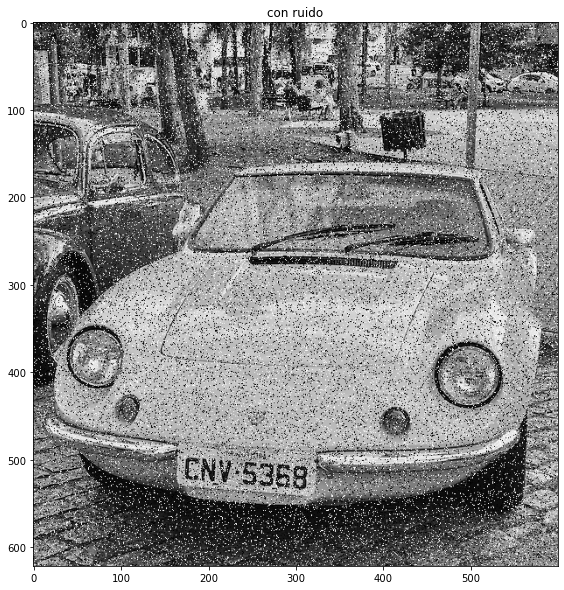

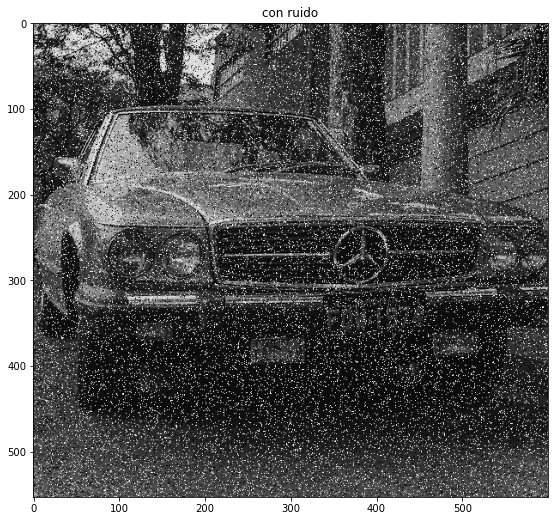

In [50]:
imshow("con ruido",img_con_ruido)
imshow("con ruido",img_con_ruido2)

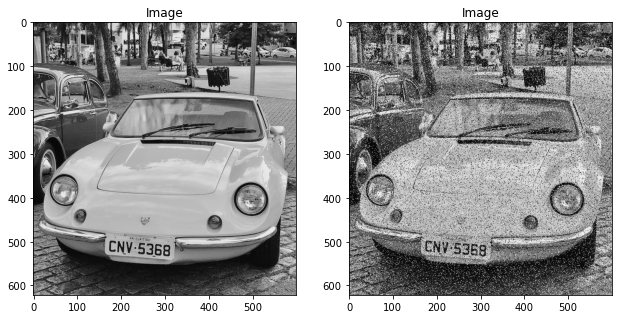

In [58]:
fullshow(original = img01,nueva = img_con_ruido)